># **<center> AirBNB Listings </center>**
>##  **<center>BANGKOK<center>**
---

## 1. Latar Belakang

Airbnb merupakan salah satu marketplace yang digunakan untuk menawarkan penginapan terutama homestay, atau pengalaman wisata. Airbnb digunakan para wisatawan untuk bepergian dengan cara yang lebih unik dan personal. Airbnb menyediakan properti seperti apartemen, kamar pribadi, hotel, dan sebagainya.

## 2. Rumusan dan Tujuan Masalah



### RUMUSAN MASALAH
Dalam konteks ini, rumusan masalahnya adalah :

1. Perusahaan ingin mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan.
2. Perusahaan juga ingin mengetahui karakteristik yang diminati untuk guest dalam memilih listing di Bangkok, Thailand?

### TUJUAN MASALAH
Sebagai data analyst, saya akan mencari tahu untuk jawabannya

1. Untuk mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan.
2. Untuk mengetahui karakteristik yang diminati untuk guest dalam memilih listing di Bangkok, Thailand.

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal, kstest

import warnings
warnings.filterwarnings("ignore")

In [6]:
df_airbnb = pd.read_csv("Airbnb Listings Bangkok.csv")
df_airbnb

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Info dataset Airbnb Listings Bangkok:

- ***Setiap `baris` mewakili sebuah `transaksi` dalam sekali reservasi.***

| No. | Fitur | Deskripsi | Detail |
|-|-|-|-|
| 1. | **Unnamed:0** | Index dari dataset. | |
| 2. | **ID** | Identifikasi unik AirBNB untuk setiap listing. | |
| 3. | **Name** | Nama Daftar. |
| 4. | **host_id** | ID Unik airBNB untuk setiap host/user. |
| 5. | **host_name** | nama Host/Nama depan. |
| 6. | **Neighborhood** | kode geografis lingkungan menggunakan garis lintang dan garis bujur terhadap lingkungan. |
| 7. | **Latitude** | Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis lintang.|
| 8. | **Longitude** |  Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis bujur. |
| 9. | **Room Type** | Tipe ruangan yang dimiliki oleh AirBNB Bangkok. | Entire Home/Apt(Apartemen) adalah pilihan terbaik jika Anda mencari tempat seperti rumah di tempat yang jauh dari rumah. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan untuk diri Anda sendiri. Biasanya, ini mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah yang dedikasi. Host sebaiknya mencantumkan di deskripsi apakah mereka akan berada di properti atau tidak (contoh: "Host mendiami lantai pertama rumah") dan memberikan rincian lebih lanjut pada daftar. |
| | | | Private Room sangat baik jika Anda menginginkan sedikit privasi dan masih menghargai koneksi lokal. Ketika Anda memesan Private Room, Anda akan memiliki kamar tidur pribadi untuk tidur dan mungkin harus berbagi beberapa ruang dengan orang lain. Anda mungkin perlu melewati ruang dalam yang mungkin dihuni oleh host atau tamu lain untuk mencapai kamar Anda.|
| | | | Hotel Room Baik yang bersifat pribadi atau bersama, Hotel Room menyediakan tingkat layanan dan keramahan yang terkait dengan hotel tradisional. Kamar-kamar ini tersedia di hotel butik atau gaya hidup, hostel, penginapan sarapan pagi, atau properti serupa. Biasanya, mereka mencakup area umum yang ramai dan kamar-kamar dengan sentuhan unik. |
| | | | Shared Room cocok bagi Anda yang tidak keberatan berbagi ruang dengan orang lain. Ketika Anda memesan kamar bersama, Anda akan tidur di ruang yang dibagikan dengan orang lain dan berbagi seluruh ruangan dengan orang lain. Shared Room populer di kalangan pelancong yang fleksibel yang mencari teman baru dan akomodasi yang ramah di kantong. |
| 10. | **Price** | Harga harian dalam mata uang lokal. Catatan, tanda $ dapat digunakan meskipun lokal. |
| 11. | **minimum_nights** | Jumlah minimum masa inap malam untuk listing (kalender aturan mungkin berbeda). |
| 12. | **number_of_reviews** | Jumlah ulasan yang dimiliki dalam daftar. |
| 13. | **last_review** | Tanggal review terakhir oleh konsumen. |
| 14. | **reviews_per_month** | Jumlah review yang diterima oleh penginapan pada satu bulan. |
| 15. | **calculated_host_listings_count** | Jumlah listing yang dimiliki oleh setiap host. |
| 16. | **availability_365** | ketersediaan_x. Kalender menentukan ketersediaan daftar x hari di masa depan. Perhatikan bahwa daftar mungkin tersedia karena sudah dipesan oleh tamu atau diblokir oleh pihak tersebut tuan rumah. |
| 17. | **number_of_reviews_ltm** | Jumlah ulasan yang dimiliki listingan (dalam 12 bulan terakhir). |

## 3. Data Understanding & Data Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning.

In [7]:
df_airbnb.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [8]:
# Deskripsi dari data Airbnb
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

## 1. Menghapus kolom Unnamed: 0

karena kolom tersebut berisi seperti kolom index

In [9]:
df_airbnb = df_airbnb.drop(columns=['Unnamed: 0'])
df_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## 2. Missing Value

In [10]:
# Mengecek missing value pada data
df_airbnb.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [11]:
# Presentase missing value ditiap kolom
df_airbnb.isna().sum()/df_airbnb.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

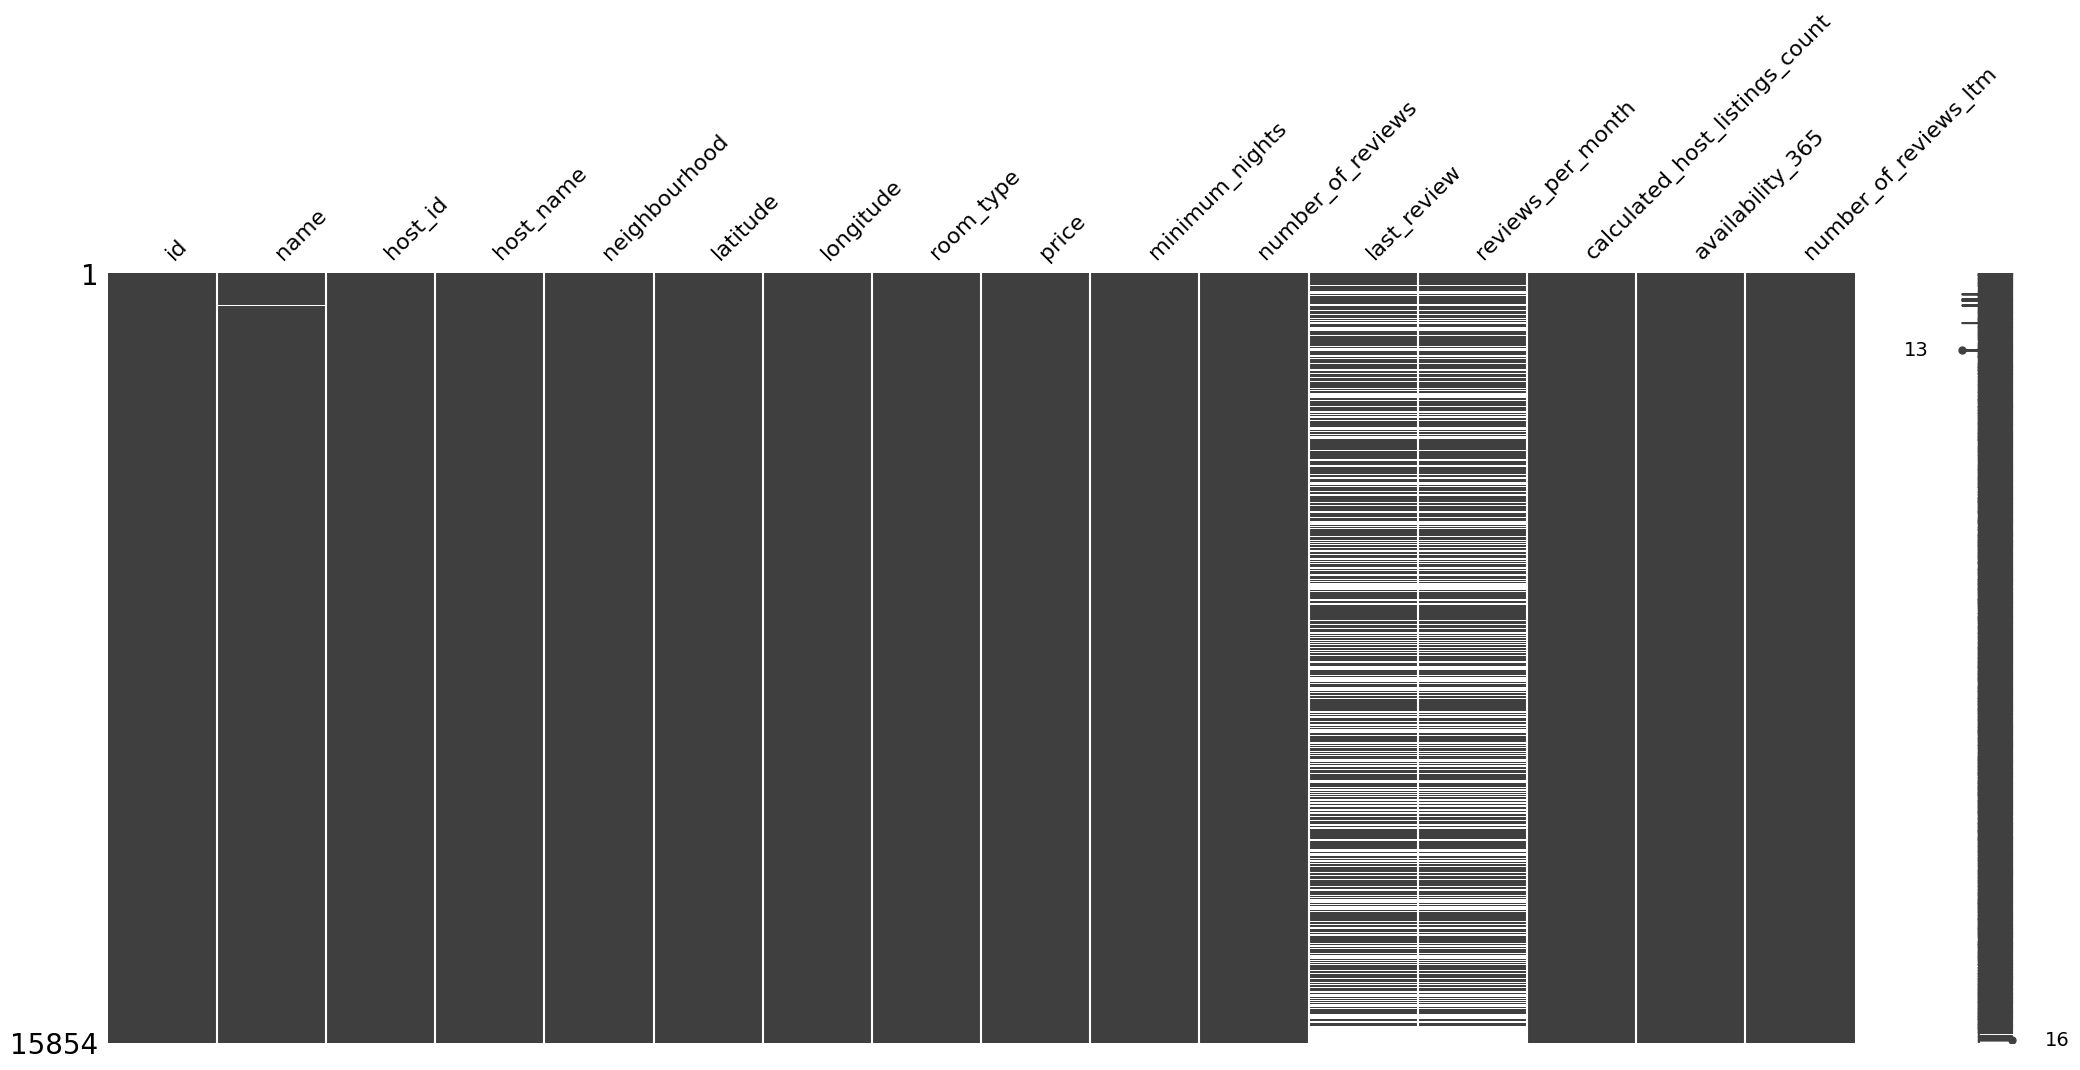

In [12]:
import missingno 
missingno.matrix(df_airbnb)

<Axes: >

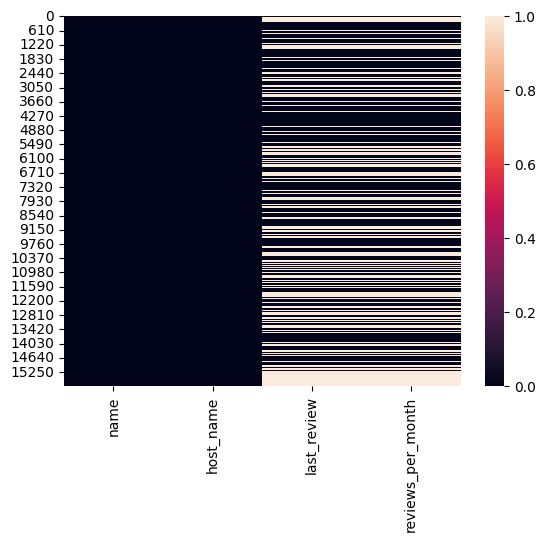

In [13]:
# Sebaran missing value didalam data

sns.heatmap(df_airbnb[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

<Axes: >

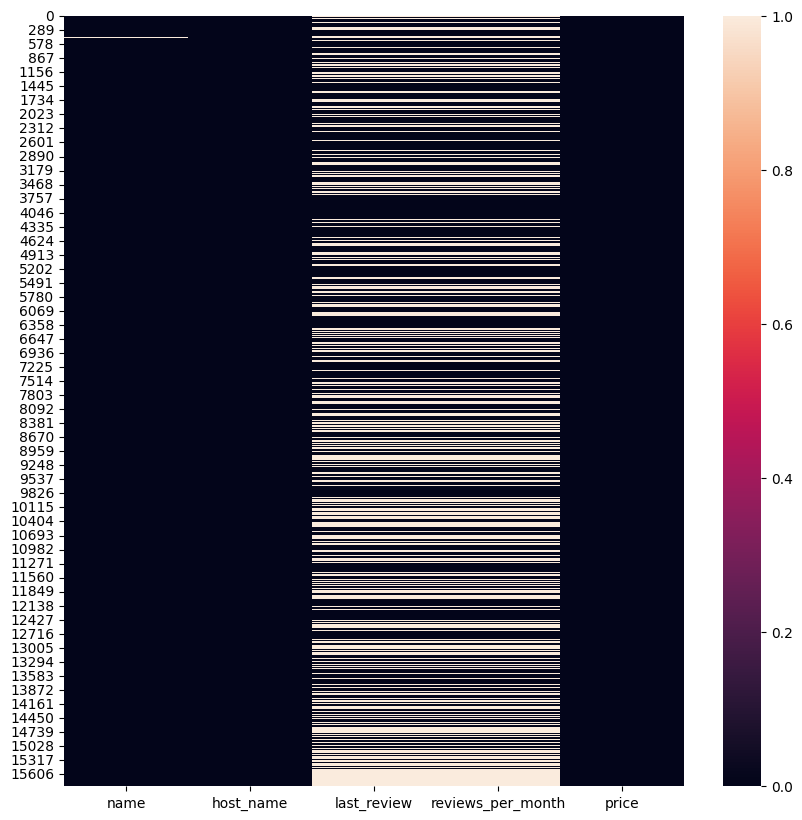

In [14]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df_airbnb[['name','host_name','last_review','reviews_per_month','price']].isna())

Secara garis besar :

- missing value di kolom `name` dan `host_name` memiliki proporsi cukup kecil (<10%), sedangkan kolom `last_review` dan `reviews_per_month` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom last_review, dan reviews_per_month adalah sama yaitu mencapai 36.52%.
- missing value di kolom `last_review`, dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.
- Kolom `last_review`, dan `reviews_per_month` memiliki missing value yang sama. Dimana kolom `last_review` mewakili sebagai tanggal terakhir customer memberikan review di listing tersebut dan kolom `reviews_per_month` adalah rata - rata jumlah review yang diperoleh dalam waktu sebulan. Jadi jika keduanya kosong adalah tidak ada pengguna yang memberikan review terhadap listing tersebut. Jadi jika tidak ada pengguna yang memberikan review terhadap listing maka tidak ada tanggal terakhir yang diberikan.

Ada 2 cara untuk menangani missing value :

- pertama, menghapus baris/kolom yang berisi missing value. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 36.5%).
- kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki missing value. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median atau modus. Menghapus data akan menjadi opsi terakhir.
Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

## a. Menangani nilai kosong pada kolom `name`

In [15]:
df_airbnb[df_airbnb['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


- Terdapat 8 data kosong pada kolom name
- Terdapat 1 host name yang memiliki calculated_host_listings_count berjumlah 3. Kita dapat berasumsi bahwa host name ini memiliki listings dengan name yang sama.
- Pada 7 missing value lainnya tidak terdapat persamaan yang dapat digunakan untuk mengisi pada data kosong tersebut.

In [16]:

# Setelah dilakukan pengecekan ternyata kita dapat mengisi kolom name yang kosong 
# berdasarkan host name dari listing yang sama
df_airbnb[df_airbnb['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [17]:
# mengisi kolom name yang kosong berdasarkan host_name yang sama
df_airbnb['name'].iloc[2075] = 'Errday Guest House'
df_airbnb[df_airbnb['host_name']=='Pakaphol']


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Tedapat 7 kolom name lain yang berisi NaN. Kita dapat berasumsi bahwa ke 7 data kosong tersebut tidak terisi saat melakukan penginputan data atau ke 7 listing tersebut sudah tidak beroperasi lagi karena pada ke 7 data kosong tersebut, jumlah dari masing-masing data kosong pada kolom availability_365 berjumlah 365. Bahkan dari ke 7 listing tersebut hanya 1 listing yang pernah mendapatkan review. Oleh sebab itu, tindakan yang diambil adalah menghapus listing tersebut karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [18]:
# Menghapus baris dari ke 7 data missing value
df = df_airbnb.dropna(subset=['name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## b. Menangani missing value pada kolom `host_name`

In [19]:
df_airbnb[df_airbnb['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Dapat kita asumsikan bahwa listing tersebut sudah tidak beroperasi, karena pada kolom availability_365 berjumlah *365* yang dapat diartikan tidak ada yang menyewa listing tersebut dan terakhir mendapatkan review pada tahun 2017. Maka, penanganan yang dilakukan adalah menghapus listing tersebut.

In [20]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## C. Menangani nilai kosong pada kolom `last_review`

In [21]:
df[df_airbnb['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Terdapat 5784 data kosong pada kolom last_review. Kita juga tidak bisa menghapus 5784 baris atau sebesar 36% data dalam dataset ini, karena itu akan berpengaruh pada hasil analisis secara keseluruhan.

In [22]:
# Mengisi missing value dari kolom last review dengan 0
df['last_review'] = df['last_review'].fillna(0)
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## D. Menangani missing value pada kolom `reviews_per_month`

In [23]:
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0,NaN,14,365,0


Terdapat **5784** missing value pada kolom `reviews_per_month`. Data kosong tersebut kosong bisa diasumsikan karena listing tersebut belum pernah mendapatkan review, sehingga kolom `reviews_per_month` yang berisi rata-rata review perbulan terakhir kosong. Maka, dari informasi tersebut kita dapat mengisi data kosong tersebut dengan nilai 0.

In [24]:
# Mengisi missing value dari kolom last review dengan 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## E. Outliers

In [25]:
#Pengecekan statistik dari beberapa kolom yang akan dicek outlier-nya
df[['minimum_nights', 'availability_365', 'price', 'number_of_reviews']].describe()

,minimum_nights,availability_365,price,number_of_reviews
count,15846.000000,15846.000000,1.584600e+04,15846.000000
mean,15.299003,244.317746,3.218430e+03,16.662123
std,50.826976,125.845791,2.497839e+04,40.622011
min,1.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,138.000000,9.000000e+02,0.000000
50%,1.000000,309.000000,1.429000e+03,2.000000
75%,7.000000,360.000000,2.429000e+03,13.000000
max,1125.000000,365.000000,1.100000e+06,1224.000000


<Axes: xlabel='price', ylabel='room_type'>

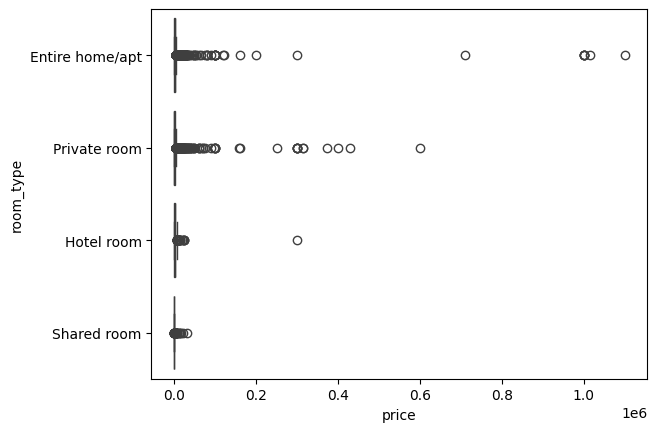

In [26]:
# Distribusi data Price berdasarkan room_type
sns.boxplot(data = df,x='price', y='room_type')

Terdapat outliers di room type entire home/apt dengan harga yang cukup tinggi namun sudah ada review. Dapat diasumsikan bahwa host bebas memberikan harga pada unit mereka dengan harga tinggi dengan bukti listing mereka juga sudah pernah ada yang memesan. Jadi tidak perlu ada tindakan yang diambil karena ini adalah valid.

<Axes: xlabel='reviews_per_month', ylabel='room_type'>

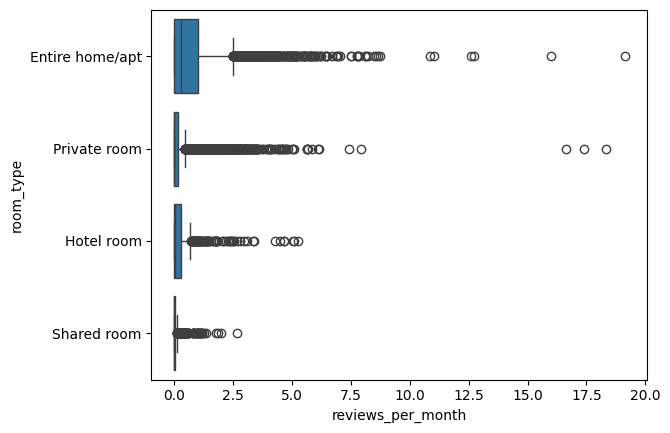

In [27]:
# Distribusi data reviews_per_month berdasarkan room type
sns.boxplot(data = df,x='reviews_per_month', y='room_type')

Terdapat outliers di room type entire home/apt dan private room dengan reviews per month cukup tinggi. Dapat diasumsikan user berhak memberi reviews yang tinggi selama masih sesuai dengan range reviews yang ditentukan oleh Airbnb. Jadi tidak perlu ada tindakan yang diambil karena ini adalah valid



## F. Data Duplikat

In [28]:
# Jumlah duplikat data pada seluruh kolom
df.duplicated().sum()

0

In [29]:
# Jumlah duplikat pada data set selain kolom id
df.drop(columns=['id']).duplicated().sum()

7

Terdapat 7 data duplikat pada dataset kecuali kolom `id`

## Menangani data duplikat

In [30]:
df[df.drop(columns=['id']).duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,0,0.0,9,361,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,0,0.0,9,361,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,0,0.0,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,0,0.0,4,180,0
15183,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,44,340,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,0,0.0,40,340,0
15549,781507744450884041,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,0,0.0,33,360,0
15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,0,0.0,33,360,0


Terdapat duplikat data apabila kita tidak mengikutsertakan kolom id dalam pencarian data duplikat. Dari Data duplikat tersebut kita mengetahui bahwa hampir setiap kolomnya berisi data yang sama kecuali pada kolom id. Maka, kita akan menghapus kolom duplikat tersebut.

In [31]:
df = df.drop_duplicates()

Sudah tidak terdapat data duplikat

### Menambah kolom baru 

Kolom Area_District

In [32]:
df['neighbourhood'].nunique()

50

In [33]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

Disini saya akan membuat kolom baru bernama area_district dimana kolom ini berisi pengelompokkan wilayah dari kolom neighbourhood di Bangkok yang terdiri dari 50 data. Saya akan memabagi menjadi 3 wilayah seperti:

- Inner(area tengah).
- Intermediate(luar dari Inner).
- Outer(area terluar)

**Dengan adanya pengelompokkan tersebut, akan memudahkan saya dalam melakukan analisis.**

Jika ingin melihat bagaimana saya melakukan pembagian wilayahnya, dapat dilihat disini dan untuk pembagian tata letak wilayahnya saya melihat disini.

In [34]:
def kategori_area_of_district(neighbourhood):
    inner = ['Chatu Chak', 'Bang Sue', 'Phaya Thai', 'Din Daeng', 'Dusit', 'Huai Khwang', 'Vadhana', 'Ratchathewi', 'Parthum Wan', 'Bang Rak', 'Sathon', 'Yan na wa', 'Bang Kho laen', 'Thon buri', 'Bangkok Yai', 'Bangkok Noi', 'Phra Nakhon', 'Pom Prap Sattru Phai', 'Samphanthawong', 'Khlong Toei', 'Khlong San']
    intermediate = ['Bang Phlat', 'Bang Khae', 'Phasi Charoen', 'Chom Thong', 'Thung khru', 'Rat Burana', 'Phra Khanong', 'Bang Na', 'Pra Wet', 'Suanluang', 'Bang Kapi', 'Saphan Sung', 'Wang Thong Lang', 'Khan Na Yao', 'Bueng Kum', 'Lat Phrao', 'Bang Khen', 'Sai Mai']
    outer = ['Thawi Watthana', 'Taling Chan', 'Nong Khaem', 'Bang Bon', 'Bang Khun thain', 'Don Mueang', 'Lak Si', 'Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang']    
    
    if neighbourhood in inner:
        return "Inner"
    elif neighbourhood in intermediate:
        return "Intermediate"
    elif neighbourhood in outer:
        return "Outer"
    else:
        return "Unknown"

# membuat kolom baru bernama area
df['area_district'] = df['neighbourhood'].apply(kategori_area_of_district)

In [35]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area_district
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Inner
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0.00,2,358,0,Intermediate
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0.00,1,365,0,Intermediate
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Inner
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0.00,3,365,0,Intermediate


## Kolom Length of Stay

In [36]:
df['minimum_nights'].nunique()

86

In [37]:
df['minimum_nights'].unique()

array([   3,    1,   60,    7,  250,    2,   15,   30,   28,   21,   27,
          4,  180,   90,    5,  358, 1125,   29,   14,  200,  365,  120,
          9,   12,  300,  360,  100,   10,   45,   23,    6,   84,  370,
         24,   31,   50,   19,   20,   75,    8,   25,   40,   26,   59,
         58,  170,  399,  998,   13,   22,  356,   16,  183,  700,  150,
         35,  355,  500,   89,   80,   18,   11,   85,  135,  198,   88,
        160,  109,  148,   51, 1115,  113,   62,  450,  270,   55,  208,
       1000,   17,  999,  400,   99, 1095,   39,  190,  364])

Disini saya akan membuat kolom baru bernama length_of_stay dimana kolom ini berisi pengelompokkan lama menginap dari kolom minimum_nights yang terdiri dari 86 data. Saya akan memabagi menjadi 3 bagian seperti;

- Short-Term : minimum_nights dibawah 7 hari atau dibawah 1 minggu
- Medium-Term :minimum_nights 8 hari - 31 hari atau 1 minggu - 1 bulan.
- Long-Term : minimum_nights diatas 31 atau 1 bulan.

Dengan adanya pengelompokkan tersebut, akan memudahkan saya dalam melakukan analisis.

In [38]:
Short_Term = 7
Medium_Term = 31

def kategori_mn(minimum_nights):
    if minimum_nights <= Short_Term:
        return "Short-Term"
    elif minimum_nights <= Medium_Term:
        return "Medium-Term"
    else:
        return "Long-Term"
    
# nama kolom baru
df['stay_type'] = df['minimum_nights'].apply(kategori_mn)

In [39]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area_district,stay_type
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Inner,Short-Term
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0.00,2,358,0,Intermediate,Short-Term
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0.00,1,365,0,Intermediate,Long-Term
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Inner,Short-Term
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0.00,3,365,0,Intermediate,Short-Term


## Data yang sudah bersih

Melihat iformasi dari data yang sudah dibersihkan

In [40]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['DataFeatures', 'DataType', 'Missing Value', 'Unique', 'UniqueSample'],
                    data=listItem)
print(df.shape)
dfDesc

(15846, 18)


,DataFeatures,DataType,Missing Value,Unique,UniqueSample
0,id,int64,0,15846,"[32198361, 10481353]"
1,name,object,0,14793,"[Better Moon guesthouse, 30days! Sukhumvit NAN..."
2,host_id,int64,0,6651,"[63340903, 218002130]"
3,host_name,object,0,5306,"[Kru, Vince Hotel]"
4,neighbourhood,object,0,50,"[Rat Burana, Phasi Charoen]"
5,latitude,float64,0,9602,"[13.68798, 13.71511]"
6,longitude,float64,0,10222,"[100.52562586963175, 100.53823]"
7,room_type,object,0,4,"[Shared room, Entire home/apt]"
8,price,int64,0,3040,"[3325, 572]"
9,minimum_nights,int64,0,86,"[999, 1125]"


- Setelah melewati tahapan Data Understanding dan Data Cleaning, dataset yang sebelumnya memiliki 16 kolom dan 15.854 baris, sekarang memiliki 18 kolom dan 15.845 baris.
- Dari total terdapat missing value yang ada, 8 baris data dihapus dan sisa data kosong diisi dengan data yang dirasa relevan.
- Terdapat 1 data anomali yang dihapus karena berdasarkan domain knowladge, data dirasa tidak valid.

## Save to.CSV and .XLSX

In [41]:
df.to_csv('Airbnb Listings Bangkok.csv')

## 4. Data Analisys

## Korelasi Antar Kolom

In [42]:
# Membuat variabel numerik yang berisi dataframe dengan tipe numeric saja
numeric = df.select_dtypes(include= 'number')
numeric


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,13.759830,100.541340,1905,3,65,0.50,2,353,0
1,27979,120541,13.668180,100.616740,1316,1,0,0.00,2,358,0
2,28745,123784,13.752320,100.624020,800,60,0,0.00,1,365,0
3,35780,153730,13.788230,100.572560,1286,7,2,0.03,1,323,1
4,941865,610315,13.768720,100.633380,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,94899359,13.715132,100.653458,2298,28,0,0.00,1,362,0
15850,790474503157243541,491526222,13.753052,100.538738,1429,1,0,0.00,14,365,0
15851,790475335086864240,491526222,13.753169,100.538700,1214,1,0,0.00,14,365,0
15852,790475546213717328,491526222,13.754789,100.538757,1214,1,0,0.00,14,365,0


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

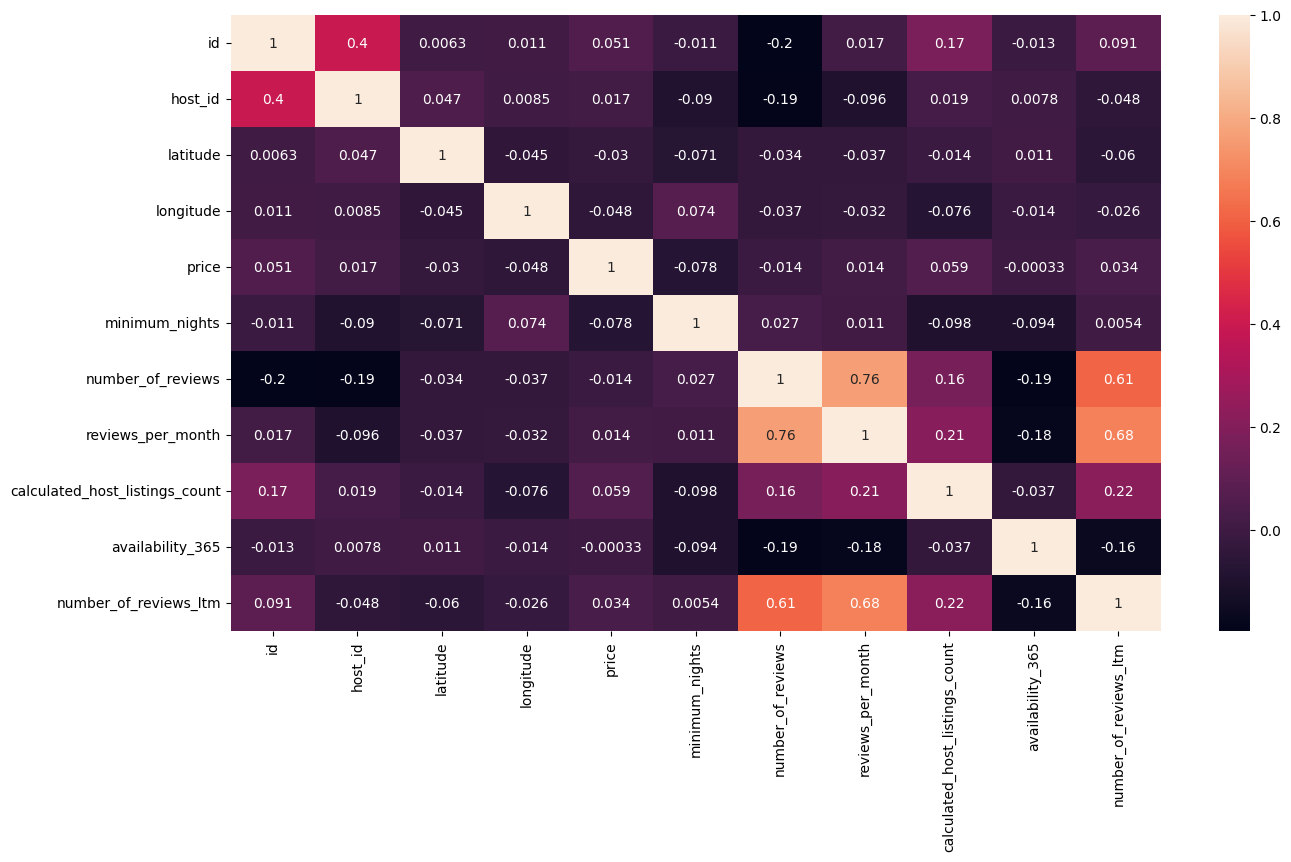

In [43]:
# Membuat Korelasi antar baris data menggunakan Heatmap Correlation
corr = numeric.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
numeric.columns

- Terdapat beberapa Korelasi yang masuk dalam kategori kuat positif (0.7 - 1). Maka, semakin tinggi nilai suatu data maka semakin tinggi kolom lainnya.
- kolom reviews_per_month berhubungan dengan number_of_reviews
- kolom reviews_per_month berhubungan dengan number_of_reviews_ltm
- kolom number_of_reviews_ltm berhubungan dengan number_of_reviews

## 1. Analisis Tipe Kamar Berdasarkan Wilayah

Saya sudah melakukan data cleaning dan sekarang saya bisa melakukan analisis untuk menjawab rumusan masalah untuk perusahaan yaitu untuk mengetahui wilayah mana saja yang akan menjadi prioritas utama dalam penentuan listing perusahaan dan karakteristik yang diminati untuk guest dalam memilih listing di Bangkok, Thailand.

In [44]:
# Jumlah listing

df['room_type'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,room_type,jumlah_listing
0,Entire home/apt,8911
1,Private room,5763
2,Hotel room,649
3,Shared room,523


In [45]:
# persentase tipe kamar listing 

room_type = df['room_type'].value_counts()
percentages = room_type / len(df) * 100
percentages.reset_index().rename(columns={'count':'proporsi_listing'})

,room_type,proporsi_listing
0,Entire home/apt,56.235012
1,Private room,36.368800
2,Hotel room,4.095671
3,Shared room,3.300517


Type Room terdapat 4 jenis :

1. Entire Home/Apt(Apartemen)

Apartemen adalah pilihan terbaik jika Anda mencari tempat seperti rumah di tempat yang jauh dari rumah. Dengan seluruh tempat, Anda akan memiliki seluruh ruangan untuk diri Anda sendiri. Biasanya, ini mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah yang dedikasi. Host sebaiknya mencantumkan di deskripsi apakah mereka akan berada di properti atau tidak (contoh: "Host mendiami lantai pertama rumah") dan memberikan rincian lebih lanjut pada daftar.

2. Private Room

Private Room sangat baik jika Anda menginginkan sedikit privasi dan masih menghargai koneksi lokal. Ketika Anda memesan Private Room, Anda akan memiliki kamar tidur pribadi untuk tidur dan mungkin harus berbagi beberapa ruang dengan orang lain. Anda mungkin perlu melewati ruang dalam yang mungkin dihuni oleh host atau tamu lain untuk mencapai kamar Anda.

3. Hotel Room

Baik yang bersifat pribadi atau bersama, Hotel Room menyediakan tingkat layanan dan keramahan yang terkait dengan hotel tradisional. Kamar-kamar ini tersedia di hotel butik atau gaya hidup, hostel, penginapan sarapan pagi, atau properti serupa. Biasanya, mereka mencakup area umum yang ramai dan kamar-kamar dengan sentuhan unik.

4. Shared Room

Shared Room cocok bagi Anda yang tidak keberatan berbagi ruang dengan orang lain. Ketika Anda memesan kamar bersama, Anda akan tidur di ruang yang dibagikan dengan orang lain dan berbagi seluruh ruangan dengan orang lain. Shared Room populer di kalangan pelancong yang fleksibel yang mencari teman baru dan akomodasi yang ramah di kantong.

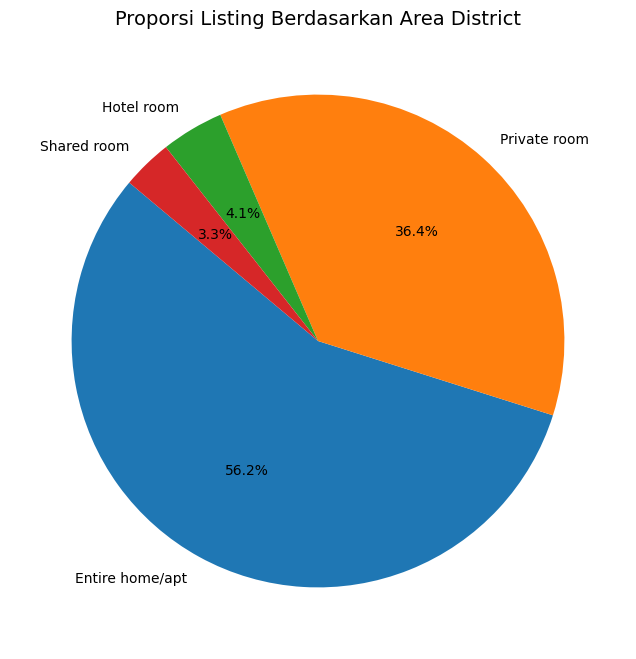

In [46]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Listing Berdasarkan Area District',size=14)
plt.show()

Berdasarkan data secara keseluruhan :

- Proporsi tipe kamar tertinggi adalah Entire home/apt, mencapai sekitar 56,2%
- Diikuti oleh Private room yang mencapai 36,4%.


Hal ini menandakan bahwa sebagian besar listing Airbnb adalah rumah atau apartemen yang disewakan kepada guest, diikuti oleh kamar pribadi yang mungkin berbagi fasilitas dengan pemilik atau guest lainnya.

In [47]:
# jumlah listing berdasarkan tipe penginapan per area
x = pd.crosstab(df['area_district'], df['room_type'])
x

room_type,Entire home/apt,Hotel room,Private room,Shared room
area_district,,,,
Inner,7169,584,4107,448
Intermediate,1542,36,1266,47
Outer,200,29,390,28


In [48]:
# Menghitung chi-square
chi2, pvalue, dof, expected = chi2_contingency(x)

# Menampilkan hasil
print("Chi-square statistic:", chi2)
print("P-value:", pvalue)

# Menentukan apakah ada hubungan yang signifikan
if pvalue <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.")

Chi-square statistic: 364.0893101326168
P-value: 1.4558207819571156e-75
Terdapat hubungan yang signifikan antara 'area_district' dan 'room_type'.


In [49]:
x = x.div(x.sum(axis=1), axis=0)
x

room_type,Entire home/apt,Hotel room,Private room,Shared room
area_district,,,,
Inner,0.582467,0.047449,0.333685,0.036399
Intermediate,0.533379,0.012452,0.437911,0.016257
Outer,0.309119,0.044822,0.602782,0.043277


<Figure size 1000x600 with 0 Axes>

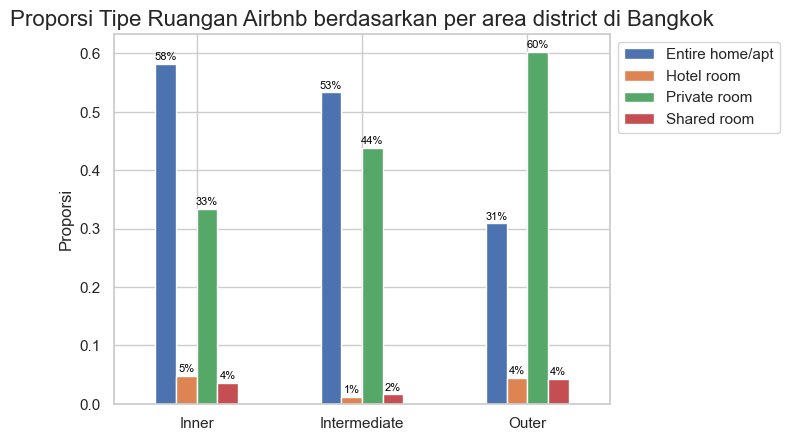

In [50]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = x.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Proporsi')
plt.title('Proporsi Tipe Ruangan Airbnb berdasarkan per area district di Bangkok',size=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Menambahkan persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Barplot ini menunjukkan bahwa proporsi tipe ruangan Airbnb berdasarkan per area district di Bangkok. Dari diagram ini, kita dapat melihat bahwa tipe ruangan **Entire home/apt** memiliki proporsi terbesar yaitu 58% di wilayah Inner dan 53% di wilayah Intermediate. Hal ini menunjukkan bahwa banyak guest/penyewa yang menginginkan privasi dan kenyamanan seperti di rumah sendiri.

Di sisi lain, tipe ruangan Hotel room dan Shared room memiliki proporsi kecil untuk di semua area district. Kemungkinan ini menunjukkan bahwa jenis akomodasi tersebut kurang populer di daerah-daerah tersebut.

### 2. Analisis Harga Berdasarkan Wilayah

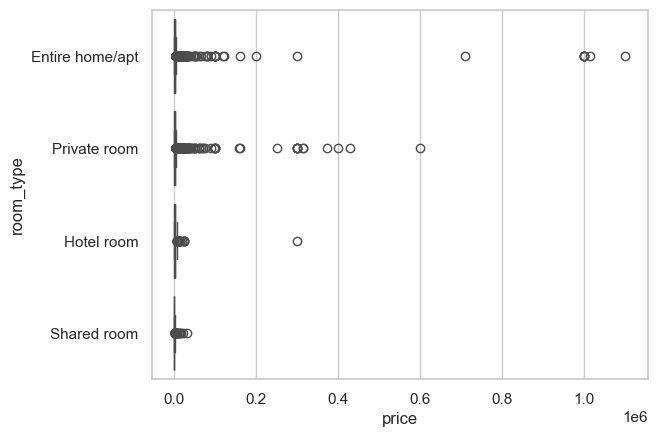

In [51]:
# cek outliers price terhadap room type
sns.boxplot(data=df, x=df['price'], y =df['room_type'])
plt.show()

Distribusi data tidak normal, maka sebaiknya menggunakan median untuk mengetahui harga per tipe ruangan agar tidak terpengaruh oleh nilai outliers.

In [52]:
median_price = df.groupby('room_type')['price'].median().reset_index().rename(columns={'price':'median_price'})
median_price

,room_type,median_price
0,Entire home/apt,1536.0
1,Hotel room,1700.0
2,Private room,1213.0
3,Shared room,500.0


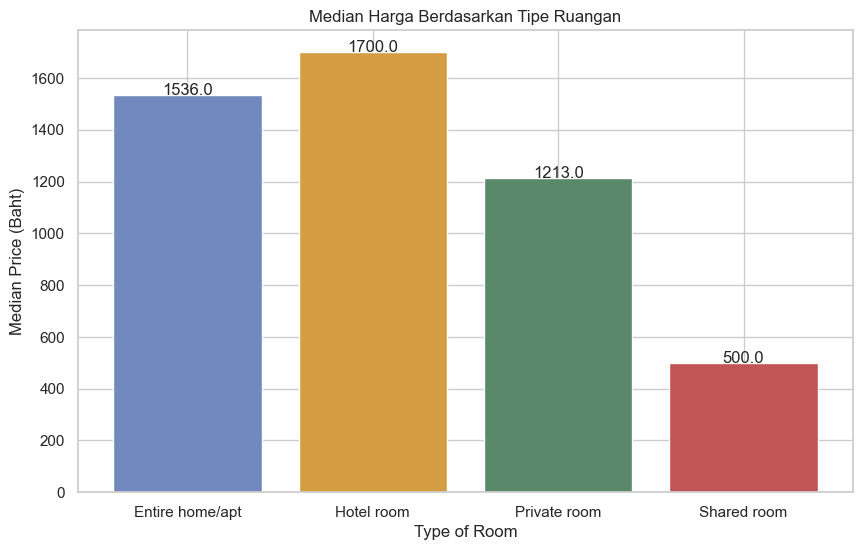

In [80]:
plt.figure(figsize=(10,6))
ax = plt.bar(x=median_price['room_type'], height=median_price['median_price'], color = ['#7189BF', '#D49D42', '#59886B', '#C05555'])
plt.title("Median Harga Berdasarkan Tipe Ruangan")
plt.xlabel("Type of Room")
plt.ylabel("Median Price (Baht)")
for height in ax.patches:
    y = height.get_height()
    x = height.get_x() + height.get_width()/2
    plt.text(x,y+0.01,s=f"{y:.1f}",ha = "center")

plt.show()

- Pada tipe ruangan Hotel room memiliki median harga yang paling tinggi. Hal ini dapat disebabkan oleh faktor-faktor seperti fasilitas dan layanan yang disediakan oleh hote yang beragam, lokasi yang strategis, atau reputasi hotel yang terkenal di daerah tersebut.
- Pada tipe ruangan Entire home/apartment, median harga cenderung lebih tinggi dibandingkan private room. Tipe ruangan ini menawarkan keseluruhan rumah atau apartemen bagi pengguna Airbnb untuk digunakan secara eksklusif. Hal ini menyebabkan median harga lebih tinggi, karena memberikan privasi dan ruang yang lebih luas.
- Tipe ruangan private room menawarkan pengguna Airbnb kamar pribadi dalam rumah atau apartemen yang ditempati oleh host atau penghuni lain. Median harga untuk private room cenderung lebih rendah daripada entire home/apartment, karena pengguna harus berbagi fasilitas dengan host atau penghuni lainnya.
- Tipe ruangan share room menawarkan pengguna Airbnb tempat tidur bersama dengan pengguna lain dalam kamar yang sama. Median harga untuk share room adalah yang terendah di antara jenis kamar lainnya, karena pengguna harus berbagi kamar dengan orang lain dan kurang akan kenyamanannya.

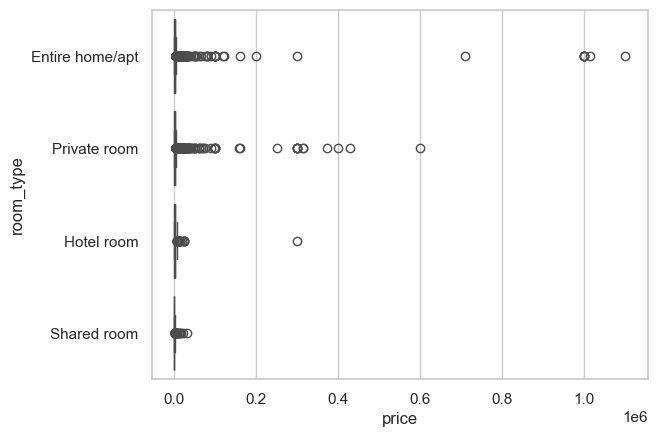

In [54]:
sns.boxplot(data=df, x=df['price'], y =df['room_type'])
plt.show()

Karena distribusi harga berdasarkan tipe ruangan tidak terdistribusi secara normal, maka analisis dilakukan dengan uji non-parametrik untuk menilai perbedaan harga antar tipe ruangan. Penggunaan median digunakan sebagai metode pembanding untuk memahami variasi harga per daerah tanpa terpengaruh oleh nilai-nilai outlier.

In [55]:
from scipy.stats import kruskal

# Melakukan uji Kruskal-Wallis
pval = kruskal(df[df['area_district'] == 'Inner']['price'], 
            df[df['area_district'] == 'Intermediate']['price'],
            df[df['area_district'] == 'Outer']['price'])

# Mengakses nilai p-value dari hasil uji
p_value = pval.pvalue

# Memeriksa apakah nilai p-value kurang dari atau sama dengan 0.05
if p_value <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

Tolak Ho


Arti dari hasil uji statistik :

Ada perbedaan yang signifikan antar wilayah berdasarkan harga

In [56]:
data_a = df.groupby(['room_type', 'area_district'])['price'].median().reset_index()
data_a

,room_type,area_district,price
0,Entire home/apt,Inner,1659.0
1,Entire home/apt,Intermediate,1000.0
2,Entire home/apt,Outer,1352.0
3,Hotel room,Inner,1781.0
4,Hotel room,Intermediate,1363.0
5,Hotel room,Outer,990.0
6,Private room,Inner,1400.0
7,Private room,Intermediate,960.0
8,Private room,Outer,850.0
9,Shared room,Inner,500.0


In [57]:
df.groupby('area_district')[['price']].sum().reset_index()

,area_district,price
0,Inner,43345005
1,Intermediate,6653754
2,Outer,1000486


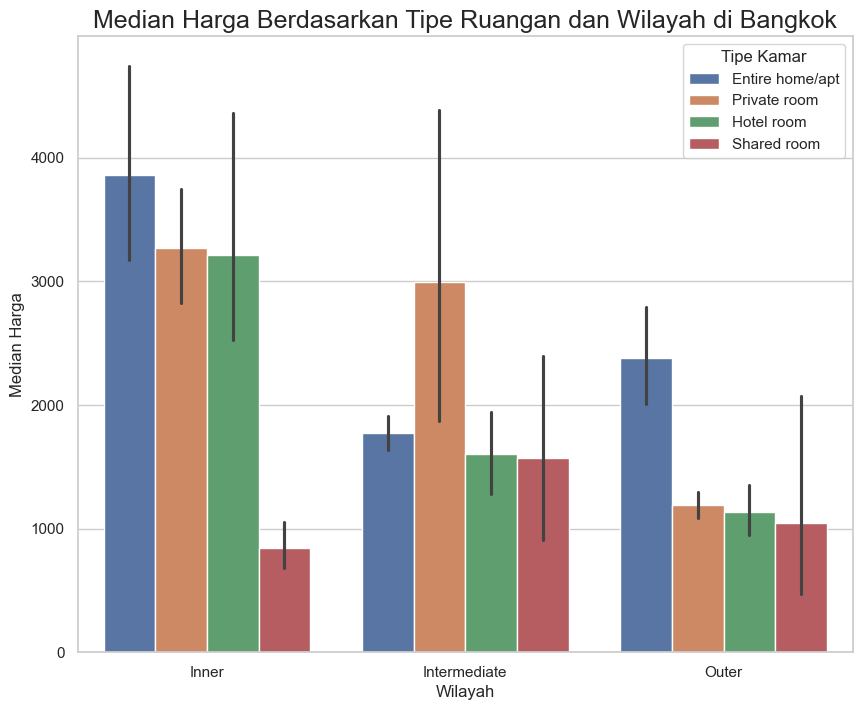

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='area_district', y='price', hue='room_type')
plt.xlabel('Wilayah',size=12)
plt.ylabel('Median Harga', size=12)
plt.title('Median Harga Berdasarkan Tipe Ruangan dan Wilayah di Bangkok',size=18)
plt.legend(title='Tipe Kamar')
plt.show()

Berdasarkan data median harga berdasarkan tipe ruangan dan wilayah (area_district) di Bangkok, berikut adalah interpretasi yang didapatkan:

- Pada wilayah Inner, harga Hotel room dan Entire home/apt di Inner merupakan yang paling tinggi dibandingkan dengan Intermediate dan Outer berdasarkan median harganya. Hal ini menunjukkan bahwa daerah Inner Bangkok mungkin memiliki peminat yang lebih tinggi dan biasanya menarik bagi pengguna yang mencari akomodasi dengan fasilitas dan lokasi premium di pusat Kota.

- Pada wilayah Intermediate, Private room median harga menjadi yang tertinggi diantara semua tipe ruangan. Dikarenakan wilayah tersebut. Dan median harga untuk semua jenis kamar di Intermediate berada di tengah-tengah, menunjukkan bahwa daerah ini menawarkan pilihan akomodasi dengan harga yang lebih terjangkau.

- Pada wilayah Outer, semua tipe ruangan memiliki median harga yang lebih rendah dari wilayah yang lainnya. Hal ini menunjukkan bahwa daerah ini mungkin menarik bagi pengguna Airbnb yang mencari akomodasi dengan harga yang lebih terjangkau atau yang ingin menjelajahi daerah yang lebih jauh dari pusat kota. Seperti ke pedesaan, area pertanian, atau perdangangan.

### 3. Analisis Lama Menginap Berdasarkan Wilayah

In [59]:
# Jumlah lama menginap

df['stay_type'].value_counts().reset_index().rename(columns={'count':'lama_menginap'})

df['room_type'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,room_type,jumlah_listing
0,Entire home/apt,8911
1,Private room,5763
2,Hotel room,649
3,Shared room,523


In [60]:
# persentase lama menginap di listing 

stay_type_count = df['stay_type'].value_counts()
percentages = stay_type_count / len(df) * 100
percentages.reset_index().rename(columns={'count':'proporsi_lama_menginap'})

,stay_type,proporsi_lama_menginap
0,Short-Term,76.385208
1,Medium-Term,18.320081
2,Long-Term,5.294712


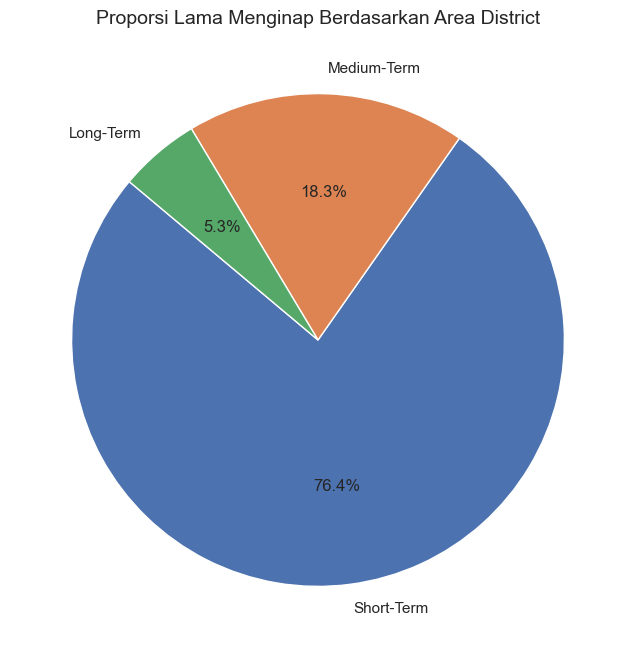

In [61]:
# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Lama Menginap Berdasarkan Area District',size=14)
plt.show()

Berdasarkan data secara keseluruhan :

- Proporsi lama menginap tertinggi adalah Short-Term, mencapai sekitar 76,4%
- Diikuti oleh Medium-Term yang mencapai 18,3%.

Hal ini menandakan bahwa sebagian besar guest hanya menginap dibawah 1 minggu, dimana guest atau wisatawan yang datang hanya untuk liburan atau ada juga yang melakukan perjalanan bisnis ke daerah tertentu.

In [62]:
# Menghitung jumlah lama menginap berdasarkan area district

area_stay = df.groupby('area_district')['stay_type'].value_counts().reset_index()
area_stay

,area_district,stay_type,count
0,Inner,Short-Term,9409
1,Inner,Medium-Term,2284
2,Inner,Long-Term,615
3,Intermediate,Short-Term,2112
4,Intermediate,Medium-Term,575
5,Intermediate,Long-Term,204
6,Outer,Short-Term,583
7,Outer,Medium-Term,44
8,Outer,Long-Term,20


  area_district    stay_type  count  prop_of_total_stays
0         Inner    Long-Term    615             3.881106
1         Inner  Medium-Term   2284            14.413732
2         Inner   Short-Term   9409            59.377761
3  Intermediate    Long-Term    204             1.287391
4  Intermediate  Medium-Term    575             3.628676
5  Intermediate   Short-Term   2112            13.328285
6         Outer    Long-Term     20             0.126215
7         Outer  Medium-Term     44             0.277673
8         Outer   Short-Term    583             3.679162


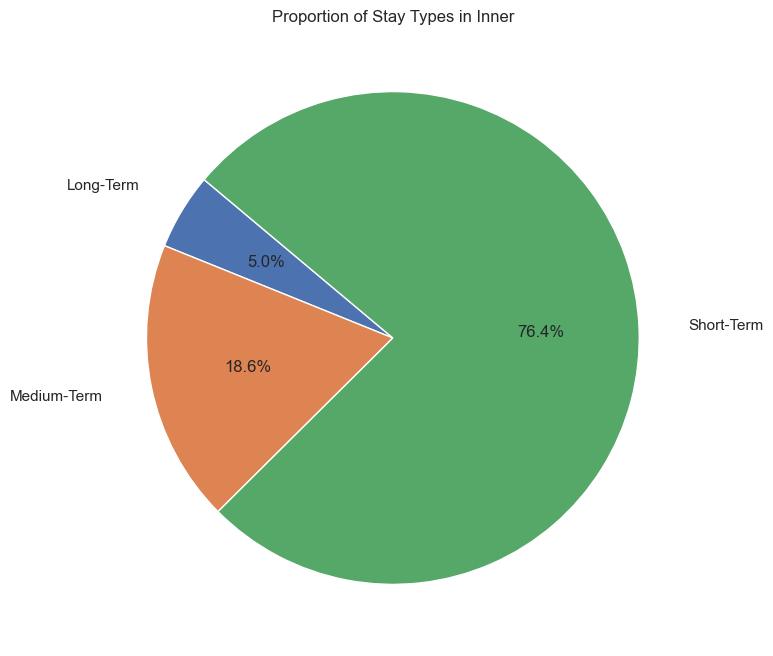

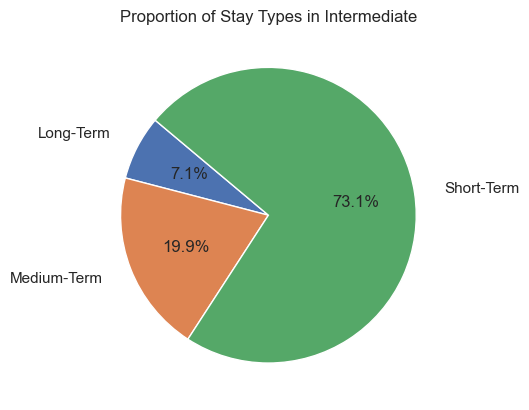

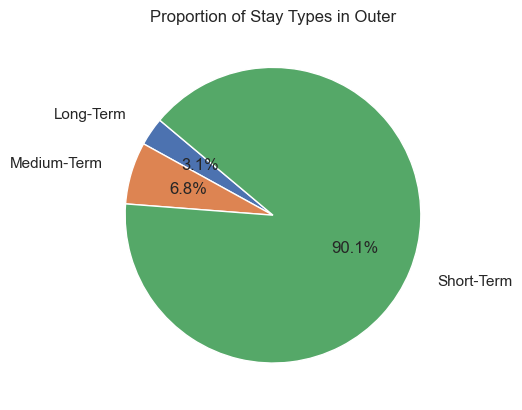

In [63]:
# Group by 'area_district' and 'stay_type' and get the counts
area_stay = df.groupby(['area_district', 'stay_type']).size().reset_index(name='count')

# Calculate total stay sum
total_stay_sum = area_stay['count'].sum()

# Calculate and update the 'prop_of_total_stays' column
area_stay['prop_of_total_stays'] = (area_stay['count'] / total_stay_sum) * 100

# Display the updated DataFrame
print(area_stay)

# Visualize proportions with a pie chart
plt.figure(figsize=(8, 8))
for district, subset in area_stay.groupby('area_district'):
    plt.pie(subset['count'], labels=subset['stay_type'], autopct='%1.1f%%', startangle=140, labeldistance=1.2)
    plt.title(f'Proportion of Stay Types in {district}')
    plt.show()

Pie chart pertama menunjukkan persentase tipe lama menginap pada wilayah Intermediate. Persentase tipe lama menginap Short-Term paling besar dengan 7.0%, sementara tipe lama menginap Long-Term paling rendah dengan 3.1%.

Pie chart kedua menunjukkan persentase tipe lama menginap pada wilayah Inner. Persentase tipe lama menginap Short-Term dan Medium-Term agak rendah, yaitu 5.0% dan 3.1% masing-masing. Tipe lama menginap Long-Term memiliki persentase yang sedikit lebih tinggi, yaitu 6.8%.

Pie chart ketiga menunjukkan persentase tipe lama menginap pada wilayah Outer. Persentase tipe lama menginap Short-Term dan Medium-Term paling besar dengan 73.1% dan 90.1% masing-masing. Tipe lama menginap Long-Term memiliki persentase yang rendah, yaitu 76.5%.

Dalam keseluruhan, dapat disimpulkan bahwa:

- Tipe lama menginap Short-Term dan Medium-Term lebih populer pada wilayah Outer daripada wilayah Intermediate dan Inner. Tipe lama menginap Long-Term lebih populer pada wilayah Inner daripada kelompok Intermediate. Tipe lama menginap paling populer pada wilayah Outer adalah Short-Term dan Medium-Term. Tipe lama menginap paling rendah pada wilayah Inner dan Outer adalah Long-Term. Tipe lama menginap paling rendah pada wilayah Intermediate adalah Long-Term dan Medium-Term.

### Kesimpulan

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan yang dapat diambil untuk mengidentifikasi karakteristik listing berdasarkan wilayah dan yang diminati oleh guest di Airbnb Listing Bangkok:

1. Pada daerah Inner, tipe ruangan Airbnb berdasarkan per area district di Bangkok. Dari sini, saya simpulkan bahwa bahwa tipe ruangan Entire home/apt memiliki proporsi terbesar yaitu 58% di wilayah Inner dan 33% di wilayah Intermediate. Hal ini menunjukkan bahwa banyak guest/penyewa yang menginginkan privasi dan kenyamanan seperti di rumah sendiri. Di sisi lain, tipe ruangan Hotel room dan Shared room memiliki proporsi kecil untuk di semua area district. Kemungkinan ini menunjukkan bahwa jenis akomodasi tersebut kurang populer di daerah-daerah tersebut.

2. Berdasarkan tipe ruangan dan wilayah (area_district) di Bangkok :

- Inner : Harga Hotel room dan Entire home/apt di Inner Bangkok cenderung lebih tinggi daripada di Intermediate dan Outer.
- Intermediate : Hotel room memiliki median harga tertinggi di wilayah Intermediate. Menandakan adanya pilihan akomodasi dengan harga yang lebih terjangkau dibandingkan dengan Inner.
- Outer : Semua tipe ruangan di Outer Bangkok memiliki median harga yang lebih rendah dibandingkan dengan wilayah lainnya. Daerah ini kemungkinan menarik bagi pengguna yang mencari akomodasi dengan harga lebih terjangkau.
3. Secara umum, wilayah Outer memiliki kecenderungan untuk menjadi tujuan utama bagi pengguna Airbnb yang melakukan kunjungan singkat atau menengah. Wilayah Inner lebih cenderung menarik bagi mereka yang mencari penginapan dalam jangka waktu yang lebih lama. Wilayah Intermediate memiliki campuran preferensi, dengan dominasi tipe Short-Term.

Berdasarkan grafik tersebut Dapat terlihat bahwa distribusi tipe kamar di keseluruhan data :

- Tipe Ruangan yang paling banyak disewakan adalah Entire home/apt dengan jumlah **8911** dan persentasenya adalah **56.23 %**
- Tipe Ruangan yang paling banyak disewakan adalah shared room dengan jumlah **523** dan persentasenya adalah **3.3 %**
- Ini menunjukan host mempunyai paling banyak listing tipe Rumah dan Apartemen disusul dengan Private room yang disediakan untuk pelanggan

Berdasarkan grafik tersebut :

- reviews_per_month rata-rata dari room type yang paling tinggi adalah Entire home/apt yaitu sebesar 0,71
- reviews_per_month rata-rata dari room type yang paling rendah adalah Shared room yaitu sebesar 0,11

### RECOMMENDATION

Berdasarkan analisis karakteristik listing Airbnb di Bangkok, terutama dalam hal tipe ruangan dan harga berdasarkan wilayah, berikut beberapa rekomendasi untuk pengembangan strategi dan peningkatan daya tarik listing:

1. Daerah Inner Bangkok :

Rekomendasi Tempat Wisata: Fokus pada promosi tempat-tempat wisata populer dan kegiatan kultural di sekitar wilayah Inner Bangkok. Jelaskan keunikan dan kenyamanan penginapan berjenis Entire home/apt, yang banyak diminati oleh tamu di wilayah ini. Rekomendasi Tambahan: Pertimbangkan menawarkan paket khusus untuk tamu yang menginap dalam jangka waktu yang lebih lama, seperti diskon untuk pemesanan mingguan atau bulanan.

2.Daerah Intermediate :

Rekomendasi Tempat Wisata: Highlight tempat-tempat unik di sekitar wilayah Intermediate, serta promosikan berbagai jenis akomodasi dengan harga yang lebih terjangkau, khususnya Hotel room yang memiliki median harga tertinggi. Rekomendasi Tambahan: Pertimbangkan kolaborasi dengan tempat-tempat populer di wilayah ini untuk menawarkan paket akomodasi dan pengalaman lokal yang menarik.

3. Daerah Outer Bangkok:

Rekomendasi Tempat Wisata: Fokus pada promosi destinasi wisata di luar kota, seperti area pedesaan, kebun buah, atau tempat-tempat alam yang menarik. Tekankan kelebihan akomodasi dengan harga lebih terjangkau. Rekomendasi Tambahan: Perkuat promosi untuk tipe ruangan Entire home/apt yang mungkin lebih diminati oleh tamu yang ingin menjelajahi daerah lebih jauh.

4. Rekomendasi Umum :

Tawarkan diskon atau paket khusus untuk pemesanan jangka panjang di wilayah Inner. Tingkatkan visibilitas listing dengan menambahkan informasi unik, foto berkualitas tinggi, dan deskripsi menarik. Perbarui harga secara berkala sesuai dengan tren pasar dan kebutuhan tamu. Selalu perhatikan umpan balik tamu dan gunakan sebagai bahan evaluasi dan peningkatan. Dengan mengikuti rekomendasi ini, diharapkan listing Airbnb di berbagai wilayah di Bangkok dapat menarik lebih banyak tamu dan memenuhi berbagai preferensi pengguna.